# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longit
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [17]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

In [18]:
# Test cities as dataframe
cities_df = pd.DataFrame(cities)
cities_df.rename(columns={0:"City"},inplace=True)
cities_df.head()

,City
0,zielonka
1,airai
2,half moon bay
3,ribeira grande
4,busselton


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [19]:
# Test URL works
base_url = "http://api.openweathermap.org/data/2.5/weather?"
key = "APPID="+api_key
units = "&units="+"imperial"


In [22]:
# Clear Process Record text file
with open("Process Record.txt", "w") as myfile:
            myfile.write("Beginning Data Retrieval \n-----------------------------")

# Loop through the cities_pd and run a lat/long search for each city
for index, row in cities_df.iterrows():
    query = "&q="+row['City']

    request = requests.get(base_url+key+query+units).json()
    
    try:
        with open("Process Record.txt", "a") as myfile:
            myfile.write("\nProcessing Record "+ str(index+1) +" of "+ str(len(cities_df)) + " | "+ row['City'])
    
        cities_df.loc[index, "Latitude"] = request["coord"]["lat"]
        cities_df.loc[index, "Longitude"] = request["coord"]["lon"]
        cities_df.loc[index, "Max Temp (F)"] = request["main"]["temp_max"]
        cities_df.loc[index, "Humidity (%)"] = request["main"]["humidity"]
        cities_df.loc[index, "Cloudiness (%)"] = request["clouds"]["all"]
        cities_df.loc[index, "Wind Speed (mph)"] = request["wind"]["speed"]
        
    except:
        with open("Process Record.txt", "a") as myfile:
            myfile.write(" -- City not found...REMOVE FROM DATASET")
else:
    with open("Process Record.txt", "a") as myfile:
        myfile.write("\n----------------------------- \nData Retrieval Complete \n-----------------------------")
    print("Compilation complete")


Compilation complete


In [23]:
# Clean data. Remove NaN

cities_df.dropna(axis="index",how="any",inplace=True)
cities_df.head(30)

,City,Latitude,Longitude,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,zielonka,52.31,21.16,32.00,81.0,0.0,5.82
1,airai,-8.93,125.41,79.56,86.0,36.0,1.59
2,half moon bay,37.46,-122.43,53.60,58.0,90.0,8.05
3,ribeira grande,38.52,-28.70,58.50,100.0,0.0,17.13
4,busselton,-33.64,115.35,76.59,78.0,48.0,16.02
5,bambous virieux,-20.34,57.76,80.60,83.0,40.0,9.17
8,geraldton,49.72,-86.95,10.40,78.0,90.0,24.16
9,port hawkesbury,45.62,-61.36,21.20,73.0,90.0,19.46
10,rincon,32.30,-81.24,66.20,29.0,1.0,14.99
11,ushuaia,-54.81,-68.31,41.00,52.0,75.0,17.22


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [24]:
cities_df.to_csv("Cities and Stats.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [26]:
date = datetime.datetime.today().strftime('%m/%d/%Y')
date

'02/24/2019'

#### Latitude vs. Temperature Plot

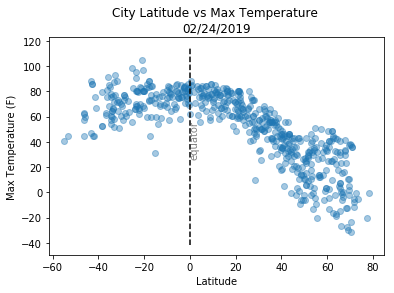

In [27]:
#cond_color = np.where(cities_df["Latitude"]>=50,'red', 'green')
mid_y = cities_df["Max Temp (F)"].mean()

plt.scatter(cities_df["Latitude"], cities_df["Max Temp (F)"],alpha=.4)
plt.vlines(0,min(cities_df["Max Temp (F)"])-10,max(cities_df["Max Temp (F)"])+10,linestyle='dashed')
plt.text(0,mid_y,"equator",rotation="vertical",color="grey")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
#replace with todays date
plt.title("City Latitude vs Max Temperature \n"+date)
plt.savefig("Lat_vs_Temp.png")
plt.show()

#### Latitude vs. Humidity Plot

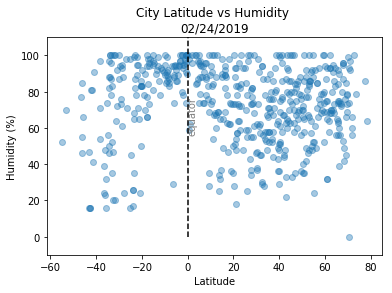

In [28]:
mid_y = cities_df["Humidity (%)"].mean()

plt.scatter(cities_df["Latitude"], cities_df["Humidity (%)"],alpha=.4)
plt.vlines(0,min(cities_df["Humidity (%)"])*.9,max(cities_df["Humidity (%)"])*1.1,linestyle='dashed')
plt.text(0,mid_y,"equator",rotation="vertical",color="grey")
plt.ylim(-10,110)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
#replace with todays date
plt.title("City Latitude vs Humidity \n"+date)
plt.savefig("Lat_vs_Humid.png")
plt.show()

#### Latitude vs. Cloudiness Plot

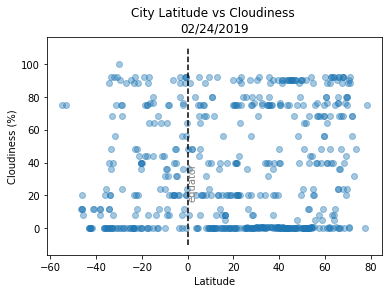

In [29]:
mid_y = cities_df["Cloudiness (%)"].mean()

plt.scatter(cities_df["Latitude"], cities_df["Cloudiness (%)"],alpha=.4)
plt.vlines(0,min(cities_df["Cloudiness (%)"])-10,max(cities_df["Cloudiness (%)"])+10,linestyle='dashed')
plt.text(0,mid_y,"equator",rotation="vertical",color="grey")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness \n"+date)
plt.savefig("Lat_vs_Cloud.png")
plt.show()

#### Latitude vs. Wind Speed Plot

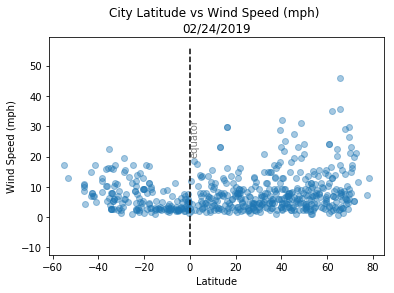

In [30]:
mid_y = cities_df["Wind Speed (mph)"].mean()

plt.scatter(cities_df["Latitude"], cities_df["Wind Speed (mph)"],alpha=.4)
plt.vlines(0,min(cities_df["Wind Speed (mph)"])-10,max(cities_df["Wind Speed (mph)"])+10,linestyle='dashed')
plt.text(0,30,"equator",rotation="vertical",color="grey")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
#replace with todays date
plt.title("City Latitude vs Wind Speed (mph) \n"+date)
plt.savefig("Lat_vs_WindSpd.png")
plt.show()